In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Loading dataset
df = pd.read_csv('Restaurant_Reviews.tsv',delimiter='\t',quoting=3)

In [3]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [4]:
df.shape

(1000, 2)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Liked,1000.0,0.5,0.50025,0.0,0.0,0.5,1.0,1.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
Review    1000 non-null object
Liked     1000 non-null int64
dtypes: int64(1), object(1)
memory usage: 11.8+ KB


# Data Preprocessing

In [7]:
# Importing essential libraries for performing Natural Language Processing
import nltk
import re
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

In [8]:
#cleaning the reviews
corpus = []
for i in range (0,1000):
    review = re.sub('[^a-zA-Z]'," ",df['Review'][i])
    review = review.lower()
    words = review.split()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    words = [ word for word in words if not word in set(all_stopwords)]
    ps = PorterStemmer()
    review = [ps.stem(word) for word in words]
    review = " ".join(review)
    corpus.append(review)

In [9]:
corpus[0:10]

['wow love place',
 'crust not good',
 'not tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch']

In [10]:
#Creating the bag of words
from sklearn.feature_extraction.text import CountVectorizer
cv  =CountVectorizer(max_features=1500)
X = cv.fit_transform(corpus).toarray()
y = df.iloc[:,1]

In [11]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

# Model Building

In [12]:
#splitting the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=0)

In [13]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import MultinomialNB
Classifier = MultinomialNB()
Classifier.fit(x_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [14]:
# Predicting the Test set results
y_pred=Classifier.predict(x_test)

In [15]:
# Accuracy, Precision,Recall and Confusion matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

score1 = accuracy_score(y_test,y_pred)
score2= precision_score(y_test,y_pred)
score3 = recall_score(y_test,y_pred)
cm = confusion_matrix(y_test, y_pred)

print('Accuracy score is:{}'.format(score1*100))
print('Precision score is:{}'.format(score2*100))
print('Recall score is:{}'.format(score3*100))
print('Confusion Matrix:\n{}'.format(cm))

Accuracy score is:82.0
Precision score is:79.24528301886792
Recall score is:85.71428571428571
Confusion Matrix:
[[40 11]
 [ 7 42]]


Text(69.0, 0.5, 'Actual values')

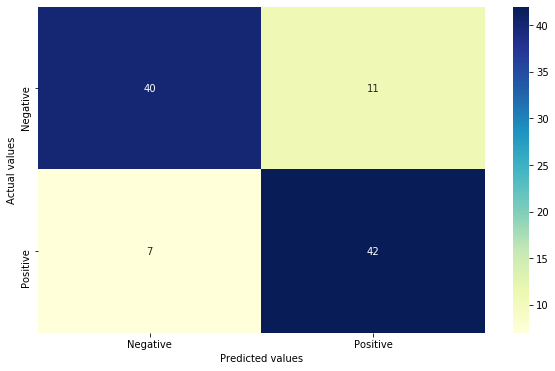

In [16]:
# Plotting the confusion matrix
plt.figure(figsize = (10,6))
sns.heatmap(cm, annot=True, cmap="YlGnBu", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

In [17]:
# Hyperparameter tuning the Naive Bayes Classifier
alpha_variable = 0.0
best_accuracy = 0.0
for i in np.arange(0.1,1.0,0.1):
    temp_Classifier = MultinomialNB(alpha=i)
    temp_Classifier.fit(x_train,y_train)
    temp_y_pred=temp_Classifier.predict(x_test)
    score = accuracy_score(y_test,temp_y_pred)
    print('Accurecy score for alpha = {} is {}'.format(round(i,1),round(score*100,2)))
    if score > best_accuracy:
        best_accuracy = score
        alpha = i
print('The Best value of alpha is {} for which Accuracy score is {}'.format(alpha,best_accuracy))

Accurecy score for alpha = 0.1 is 82.0
Accurecy score for alpha = 0.2 is 83.0
Accurecy score for alpha = 0.3 is 82.0
Accurecy score for alpha = 0.4 is 82.0
Accurecy score for alpha = 0.5 is 82.0
Accurecy score for alpha = 0.6 is 81.0
Accurecy score for alpha = 0.7 is 82.0
Accurecy score for alpha = 0.8 is 82.0
Accurecy score for alpha = 0.9 is 82.0
The Best value of alpha is 0.2 for which Accuracy score is 0.83


In [18]:
Classifier = MultinomialNB(alpha = 0.2)
Classifier.fit(x_train,y_train)
y_pred = Classifier.predict(x_test)

In [19]:
score1 = accuracy_score(y_test,y_pred)
score2= precision_score(y_test,y_pred)
score3 = recall_score(y_test,y_pred)
cm = confusion_matrix(y_test, y_pred)

print('Accuracy score is:{}'.format(score1*100))
print('Precision score is:{}'.format(score2*100))
print('Recall score is:{}'.format(score3*100))
print('Confusion Matrix:\n{}'.format(cm))

Accuracy score is:83.0
Precision score is:79.62962962962963
Recall score is:87.75510204081633
Confusion Matrix:
[[40 11]
 [ 6 43]]


Text(69.0, 0.5, 'Actual values')

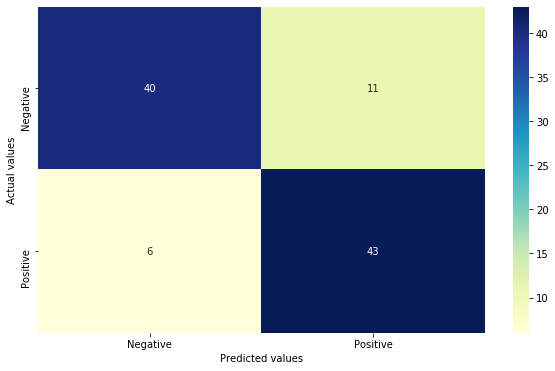

In [20]:
plt.figure(figsize = (10,6))
sns.heatmap(cm, annot=True, cmap="YlGnBu", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

# Prediction

In [21]:
def predict_sentiment(sample_review):
    sample_review = re.sub('[^a-zA-Z]',' ',str(sample_review))
    sample_review =sample_review.lower()
    sample_words = sample_review.split()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    sample_words = [word for word in sample_words if not word in set(all_stopwords)]
    ps = PorterStemmer()
    final_review = [ps.stem(word) for word in sample_words]
    final_review = ' '.join(final_review)
    
    temp = cv.transform([final_review]).toarray()
    return Classifier.predict(temp)

In [22]:
def Sentiment(sample_review):
    if predict_sentiment(sample_review):
        print('This is a POSITIVE review.')
    else:
        print('This is a NEGATIVE review!')

In [23]:
Sentiment('Food was pretty bad and the service was very slow.')

This is a NEGATIVE review!


In [24]:
Sentiment('The food was absolutely wonderful, from preparation to presentation, very pleasing.')

This is a POSITIVE review.


In [25]:
Sentiment('The food was delicious.')

This is a POSITIVE review.


In [26]:
Sentiment('The food was not good')

This is a NEGATIVE review!
